# FIFA 21 Player analysis and Visualization

## Context

The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 21 ("players_21.csv"). The data allows multiple comparison of the same players across the last 7 version of the videogame.

#### Data Source: https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv

# Importing the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa = pd.read_csv("players_21.csv")
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24-06-1987,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05-02-1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07-01-1993,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21-08-1988,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05-02-1992,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
fifa.shape

(18944, 106)

In [4]:
fifa.size

2008064

In [5]:
fifa.info

<bound method DataFrame.info of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés 

#### We have 18944 rows and 106 columns

# Data cleaning 

In [6]:
fifa.isnull().sum().head(50)

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

In [7]:
round(100*(fifa.isnull().sum()/len(fifa.index)),2).head(50)

sofifa_id                      0.00
player_url                     0.00
short_name                     0.00
long_name                      0.00
age                            0.00
dob                            0.00
height_cm                      0.00
weight_kg                      0.00
nationality                    0.00
club_name                      1.19
league_name                    1.19
league_rank                    1.19
overall                        0.00
potential                      0.00
value_eur                      0.00
wage_eur                       0.00
player_positions               0.00
preferred_foot                 0.00
international_reputation       0.00
weak_foot                      0.00
skill_moves                    0.00
work_rate                      0.00
body_type                      0.00
real_face                      0.00
release_clause_eur             5.25
player_tags                   92.57
team_position                  1.19
team_jersey_number          

In [8]:
# Let us see if there are columns with one unique value 

fifa.nunique().sort_values()

defending_marking        0
real_face                2
preferred_foot           2
league_rank              4
skill_moves              5
                     ...  
dob                   6236
short_name           17884
long_name            18896
player_url           18944
sofifa_id            18944
Length: 106, dtype: int64

In [9]:
#### There are no columns with one unique value. 

# Deleting the columns that we don't need 

In [10]:
Del_col = ['sofifa_id','dob','long_name','player_url','long_name',
               'body_type','real_face','nation_position','loaned_from',
               'nation_jersey_number','release_clause_eur','player_tags',
               'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf','rw', 'lam', 'cam'
               , 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm',
               'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [11]:
fifa.drop(columns=Del_col,inplace=True)


In [12]:
fifa.shape

(18944, 69)

In [13]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,NaN,30,29,9,9,15,15,11


# Let us analyze the top 150 players 

In [14]:
fifa = fifa[:150]

In [15]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,NaN,30,29,9,9,15,15,11


In [16]:
fifa.shape

(150, 69)

# Let us find out the missing values in it 

In [17]:
fifa.isnull().sum().sort_values(ascending = False).head(50)

defending_marking            150
gk_reflexes                  128
gk_handling                  128
gk_positioning               128
gk_speed                     128
gk_diving                    128
gk_kicking                   128
shooting                      22
passing                       22
dribbling                     22
defending                     22
physic                        22
pace                          22
player_traits                  9
movement_reactions             0
movement_agility               0
movement_sprint_speed          0
movement_acceleration          0
skill_ball_control             0
skill_long_passing             0
movement_balance               0
skill_curve                    0
mentality_penalties            0
goalkeeping_positioning        0
goalkeeping_kicking            0
goalkeeping_handling           0
goalkeeping_diving             0
defending_sliding_tackle       0
defending_standing_tackle      0
mentality_composure            0
mentality_

In [18]:
# Let us filter out the columns with missing values 

missing_data = fifa.isnull().sum()
print(missing_data[missing_data > 0])

pace                  22
shooting              22
passing               22
dribbling             22
defending             22
physic                22
gk_diving            128
gk_handling          128
gk_kicking           128
gk_reflexes          128
gk_speed             128
gk_positioning       128
player_traits          9
defending_marking    150
dtype: int64


#### Now it is clear that there are five columns that have 22 missing values in each of them

In [19]:
fifa[fifa.pace.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

In [20]:
fifa[fifa.shooting.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

In [21]:
fifa[fifa.passing.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

In [22]:
fifa[fifa.dribbling.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

In [23]:
fifa[fifa.defending.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

In [24]:
fifa[fifa.physic.isnull()]["team_position"]

2      GK
7      GK
9      GK
12     GK
16     GK
18     GK
23     GK
36     GK
40     GK
44     GK
54     GK
59     GK
63     GK
75     GK
89     GK
110    GK
113    GK
122    GK
123    GK
126    GK
144    GK
145    GK
Name: team_position, dtype: object

## Reason for the missing values for goalkeepers 

Goalkeepers in football don't play in positions where footballers dribble, pass, pace, or shoot or defend. Henc, we find these missing values under these columns. We should not replace these values with the 0 as goalkeepers can pass, dribble and it is not jusitifiable. Hence, we will replace these missing values with the minimum values. 

In [25]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Replacing the five columns having missing values with minimum values

missing_values_list = ['pace','shooting','passing','dribbling','defending']
for x in missing_values_list:
        fifa[x].fillna(fifa[x].min(), inplace=True)

In [27]:
# We don't use minimum values for physic column as some goalkeepers have better physic than others

fifa['physic'].fillna(fifa['physic'].mean(), inplace=True)


In [28]:
# Let us check out the missing values again 

fifa.isnull().sum().sort_values(ascending = False).head(50)

defending_marking             150
gk_handling                   128
gk_kicking                    128
gk_diving                     128
gk_positioning                128
gk_speed                      128
gk_reflexes                   128
player_traits                   9
skill_curve                     0
power_shot_power                0
skill_dribbling                 0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_acceleration           0
movement_sprint_speed           0
movement_agility                0
movement_reactions              0
movement_balance                0
power_jumping                   0
attacking_short_passing         0
mentality_composure             0
goalkeeping_positioning         0
goalkeeping_kicking             0
goalkeeping_handling            0
goalkeeping_diving              0
defending_sliding_tackle        0
defending_standing_tackle       0
mentality_penalties             0
power_stamina 

In [29]:
## We can see that 9 players are missing the player_traits. Let us replace them with no traits available

fifa['player_traits'] = fifa['player_traits'].fillna('No traits available')

                            ## defending_marking ##
# defending_marking is missing for all 100 players so we will just delete it 

fifa.drop(columns='defending_marking',inplace=True)

In [30]:
# Let us check for missing values again 

fifa.isnull().sum().sort_values(ascending = False).head(50)

gk_diving                     128
gk_positioning                128
gk_speed                      128
gk_reflexes                   128
gk_kicking                    128
gk_handling                   128
skill_long_passing              0
movement_agility                0
movement_sprint_speed           0
movement_acceleration           0
skill_ball_control              0
short_name                      0
skill_fk_accuracy               0
skill_curve                     0
movement_balance                0
skill_dribbling                 0
attacking_volleys               0
movement_reactions              0
power_shot_power                0
attacking_heading_accuracy      0
power_jumping                   0
goalkeeping_positioning         0
goalkeeping_kicking             0
goalkeeping_handling            0
goalkeeping_diving              0
defending_sliding_tackle        0
defending_standing_tackle       0
mentality_composure             0
mentality_penalties             0
mentality_visi

In [31]:
missing_data = fifa.isnull().sum()
print(missing_data[missing_data > 0])

gk_diving         128
gk_handling       128
gk_kicking        128
gk_reflexes       128
gk_speed          128
gk_positioning    128
dtype: int64


In [32]:
# These outfield players don't get any goalkeeper ratings. Let us replace them with a very small value

fifa.fillna(10,inplace=True)


In [33]:
# Let us check for missing values one more time 

fifa.isnull().sum().sort_values(ascending = False).head(50)

short_name                    0
skill_long_passing            0
movement_balance              0
movement_reactions            0
movement_agility              0
movement_sprint_speed         0
movement_acceleration         0
skill_ball_control            0
skill_fk_accuracy             0
age                           0
skill_curve                   0
skill_dribbling               0
attacking_volleys             0
attacking_short_passing       0
attacking_heading_accuracy    0
attacking_finishing           0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

In [34]:
missing_data = fifa.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


#### Now there are no missing values in this dataset. Let us start with Exploratory data analysis and visualization for this cleaned dataset. 

# Exploratory Data Analysis and Visualization

## Average rating of football player by nationality 

In [35]:
fifa[fifa["age"]>30]

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,82,84,95,32,24,7,11,15,14,11
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,79,88,88,42,19,15,6,12,8,10
13,S. Agüero,32,173,70,Argentina,Manchester City,English Premier League,1.0,89,89,...,83,75,91,29,24,13,15,6,11,14
14,Sergio Ramos,34,184,82,Spain,Real Madrid,Spain Primera Division,1.0,89,89,...,71,92,88,88,90,11,8,9,7,11
15,K. Benzema,32,185,81,France,Real Madrid,Spain Primera Division,1.0,89,89,...,87,84,90,24,18,13,11,5,5,7
16,M. Neuer,34,193,92,Germany,FC Bayern München,German 1. Bundesliga,1.0,89,89,...,70,47,70,10,11,87,87,91,86,89
23,S. Handanovič,35,193,92,Slovenia,Inter,Italian Serie A,1.0,88,88,...,41,23,69,10,13,88,85,73,89,89
35,G. Chiellini,35,187,85,Italy,Juventus,Italian Serie A,1.0,87,87,...,50,50,84,90,88,3,3,2,4,3
36,H. Lloris,33,188,82,France,Tottenham Hotspur,English Premier League,1.0,87,87,...,30,40,65,10,18,89,82,68,84,90


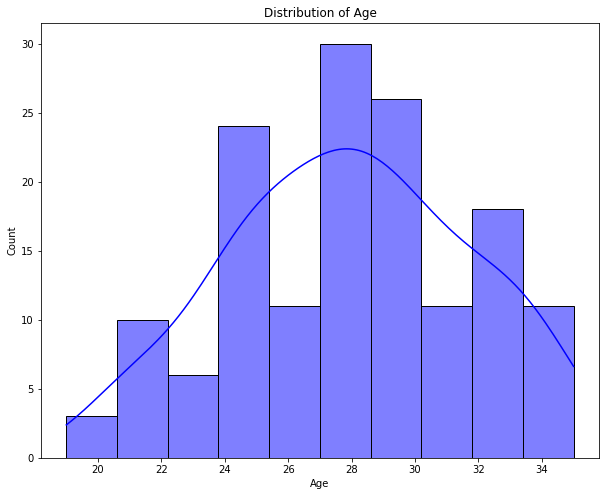

In [36]:
plt.figure(figsize=(10,8))

ax = sns.histplot(data=fifa, x='age', kde=True, bins=10, color='b')

ax.set(xlabel='Age',ylabel='Count',title='Distribution of Age',)

plt.show()

#### Majority of football players have an age between 27 and 30 

## What countries do the top 150 football players belong to? 

In [37]:
fifa.nationality.unique()

array(['Argentina', 'Portugal', 'Slovenia', 'Poland', 'Brazil', 'Belgium',
       'France', 'Germany', 'Netherlands', 'Senegal', 'Egypt', 'Spain',
       'England', 'Scotland', 'Italy', 'Uruguay', 'Croatia', 'Gabon',
       'Costa Rica', 'Korea Republic', 'Switzerland', 'Serbia',
       'Slovakia', 'Morocco', 'Bosnia Herzegovina', 'Hungary', 'Denmark',
       'Algeria', 'Norway', 'Cameroon', 'Nigeria', 'Ghana', 'Mexico',
       'Austria', 'Albania'], dtype=object)

In [38]:
len(fifa.nationality.unique())

35

#### The top 150 ranked footballers belong to 35 countries 

## What is the average age of the top 150 footbal players?

In [39]:
fifa.age.mean()

27.893333333333334

#### The average age of top 150 football players across the world in 2021 is 27.89 or 28

## What is the average overall of top 7 football playing nations? 

In [40]:
country = ['Brazil', 'Belgium', 'France', 'Netherlands', 'Spain', 'Italy', 'Portugal']

In [41]:
fifa_country = fifa[fifa['nationality'].isin(country)]

In [42]:
barplot = fifa_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
barplot

,nationality,overall
0,Belgium,86.714286
1,Brazil,86.066667
2,France,85.800000
3,Italy,85.571429
4,Netherlands,85.285714
5,Portugal,86.142857
6,Spain,85.000000


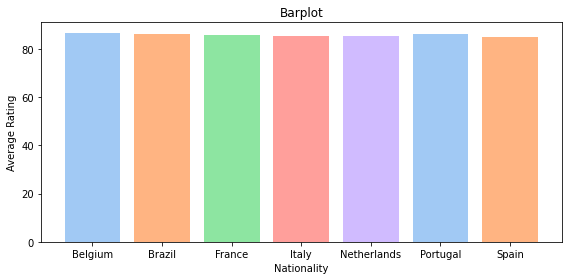

In [43]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

## What is the average wage and value of the top 150 players? 

In [44]:
fifa.wage_eur.mean() # The average wage in euros for the top 150 football players is 143,640

143640.0

In [45]:
fifa.value_eur.mean() # The average value of top 150 players is 40990000. 

40990000.0

## Visualize the distribution of overall

Text(0.5, 1.0, 'Overall')

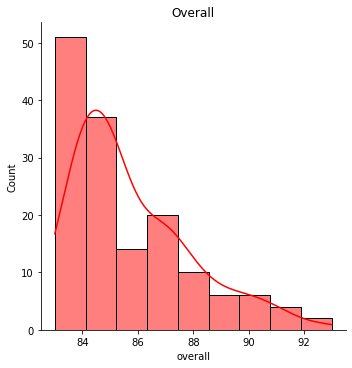

In [46]:
sns.displot(fifa.overall,kde=True,color='r')
plt.title('Overall')

#### The overall is ditributed between 84 and 85

## Creating a BMI columns to work with 

In [47]:
fifa['bmi']= (fifa['weight_kg']/((fifa['height_cm']/100)**2))
fifa.head(5)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,75,96,35,24,6,11,15,14,8,24.913495
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,84,95,32,24,7,11,15,14,11,23.735308
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,11,68,12,18,87,92,78,90,90,24.615211
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,88,42,19,15,6,12,8,10,23.629490
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,30,29,9,9,15,15,11,22.204082


## What is the average BMI of the top 150 players?

In [48]:
fifa.bmi.mean()

23.12466175782775

#### The average bmi of the top 150 players is 23.12

## Visualize the distribution of BMI 

Text(0.5, 1.0, 'BMI')

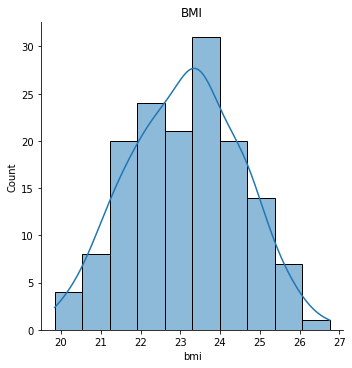

In [49]:
sns.displot(fifa.bmi,kde=True)
plt.title('BMI')

#### The BMI of top 150 players is highly distributed between 23 and 24

## Who are the top 10 fastest players?

In [50]:
fastest_df = fifa.sort_values(by='pace',ascending=False).head(10)
fastest_df

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,...,70,84,34,32,13,5,7,11,6,23.040020
10,S. Mané,28,175,69,Senegal,Liverpool,English Premier League,1.0,90,90,...,71,84,42,38,10,10,15,7,14,22.530612
66,L. Sané,24,183,75,Germany,FC Bayern München,German 1. Bundesliga,1.0,85,90,...,71,80,32,35,8,12,9,9,14,22.395413
128,Douglas Costa,29,172,70,Brazil,Juventus,Italian Serie A,1.0,84,84,...,77,80,38,34,13,15,9,12,5,23.661439
41,P. Aubameyang,31,187,80,Gabon,Arsenal,English Premier League,1.0,87,87,...,78,88,29,36,6,9,15,9,9,22.877406
108,K. Coman,24,179,75,France,FC Bayern München,German 1. Bundesliga,1.0,84,88,...,70,76,27,21,5,3,5,3,5,23.407509
11,M. Salah,28,175,71,Egypt,Liverpool,English Premier League,1.0,90,90,...,83,90,43,41,14,14,9,11,14,23.183673
19,R. Sterling,25,170,69,England,Manchester City,English Premier League,1.0,88,90,...,69,80,53,47,15,12,12,15,9,23.875433
91,K. Walker,30,183,70,England,Manchester City,English Premier League,1.0,85,85,...,63,75,83,82,12,6,16,15,8,20.902386
142,O. Dembélé,23,178,67,France,FC Barcelona,Spain Primera Division,1.0,83,89,...,75,80,30,33,6,6,14,10,13,21.146320


## Who are the top 10 best dribblers? 

In [51]:
fastest_df = fifa.sort_values(by='dribbling',ascending=False).head(10)
fastest_df

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,75,96,35,24,6,11,15,14,8,24.913495
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,30,29,9,9,15,15,11,22.204082
34,Bernardo Silva,25,173,64,Portugal,Manchester City,English Premier League,1.0,87,88,...,68,87,59,40,9,10,14,12,9,21.383942
25,E. Hazard,29,175,74,Belgium,Real Madrid,Spain Primera Division,1.0,88,88,...,87,90,27,22,11,12,6,8,8,24.163265
22,P. Dybala,26,177,75,Argentina,Juventus,Italian Serie A,1.0,88,89,...,86,84,48,40,5,4,4,5,8,23.939481
97,L. Insigne,29,163,59,Italy,Napoli,Italian Serie A,1.0,85,85,...,74,83,24,22,8,4,14,9,10,22.206331
128,Douglas Costa,29,172,70,Brazil,Juventus,Italian Serie A,1.0,84,84,...,77,80,38,34,13,15,9,12,5,23.661439
28,J. Sancho,20,180,76,England,Borussia Dortmund,German 1. Bundesliga,1.0,87,93,...,60,84,41,32,7,11,10,11,13,23.456790
6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,...,70,84,34,32,13,5,7,11,6,23.040020
92,Thiago,29,174,70,Spain,Liverpool,English Premier League,1.0,85,85,...,75,86,71,68,6,11,7,9,13,23.120624


In [52]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,75,96,35,24,6,11,15,14,8,24.913495
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,84,95,32,24,7,11,15,14,11,23.735308
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,11,68,12,18,87,92,78,90,90,24.615211
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,88,42,19,15,6,12,8,10,23.629490
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,30,29,9,9,15,15,11,22.204082


## Who are the top 10 most valuable players? 

In [53]:
fastest_df = fifa.sort_values(by='value_eur',ascending=False).head(10)
fastest_df

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,...,70,84,34,32,13,5,7,11,6,23.040020
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,92,93,30,29,9,9,15,15,11,22.204082
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,...,84,91,65,53,15,13,5,10,13,21.366869
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,88,42,19,15,6,12,8,10,23.629490
10,S. Mané,28,175,69,Senegal,Liverpool,English Premier League,1.0,90,90,...,71,84,42,38,10,10,15,7,14,22.530612
11,M. Salah,28,175,71,Egypt,Liverpool,English Premier League,1.0,90,90,...,83,90,43,41,14,14,9,11,14,23.183673
8,V. van Dijk,28,193,92,Netherlands,Liverpool,English Premier League,1.0,90,91,...,62,90,93,86,13,10,13,11,11,24.698650
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,11,68,12,18,87,92,78,90,90,24.615211
19,R. Sterling,25,170,69,England,Manchester City,English Premier League,1.0,88,90,...,69,80,53,47,15,12,12,15,9,23.875433
22,P. Dybala,26,177,75,Argentina,Juventus,Italian Serie A,1.0,88,89,...,86,84,48,40,5,4,4,5,8,23.939481


#### K.Mbappe is the most valuable player with 105500000 euros

## What are the clubs in top 150 according to leagues?

In [54]:
clubs_df = fifa.groupby('league_name').count()[['club_name']]
clubs_df

,club_name
league_name,
English Premier League,48
French Ligue 1,10
German 1. Bundesliga,20
Holland Eredivisie,2
Italian Serie A,30
Portuguese Liga ZON SAGRES,4
Spain Primera Division,36


## Most players in top 150 by a club

In [55]:
m = fifa.groupby('club_name',as_index=False,sort=True).size()
m

,club_name,size
0,AS Monaco,1
1,Ajax,2
2,Arsenal,2
3,Atalanta,2
4,Atlético Madrid,6
5,Borussia Dortmund,8
6,Borussia Mönchengladbach,1
7,Chelsea,6
8,Everton,1
9,FC Barcelona,11


## Which country has the highest number of top 150 players according to FIFA?

In [56]:
fifa.nationality.value_counts()

Spain                 21
Brazil                15
Germany               15
France                15
England               10
Argentina              8
Netherlands            7
Italy                  7
Portugal               7
Belgium                7
Uruguay                4
Senegal                3
Slovenia               3
Croatia                2
Norway                 2
Mexico                 2
Switzerland            2
Poland                 2
Denmark                2
Costa Rica             1
Cameroon               1
Austria                1
Morocco                1
Serbia                 1
Albania                1
Nigeria                1
Gabon                  1
Scotland               1
Ghana                  1
Slovakia               1
Algeria                1
Korea Republic         1
Hungary                1
Egypt                  1
Bosnia Herzegovina     1
Name: nationality, dtype: int64

#### Spain has the maximum number of players in the top 150 rankings according to FIFA. It is visualized below

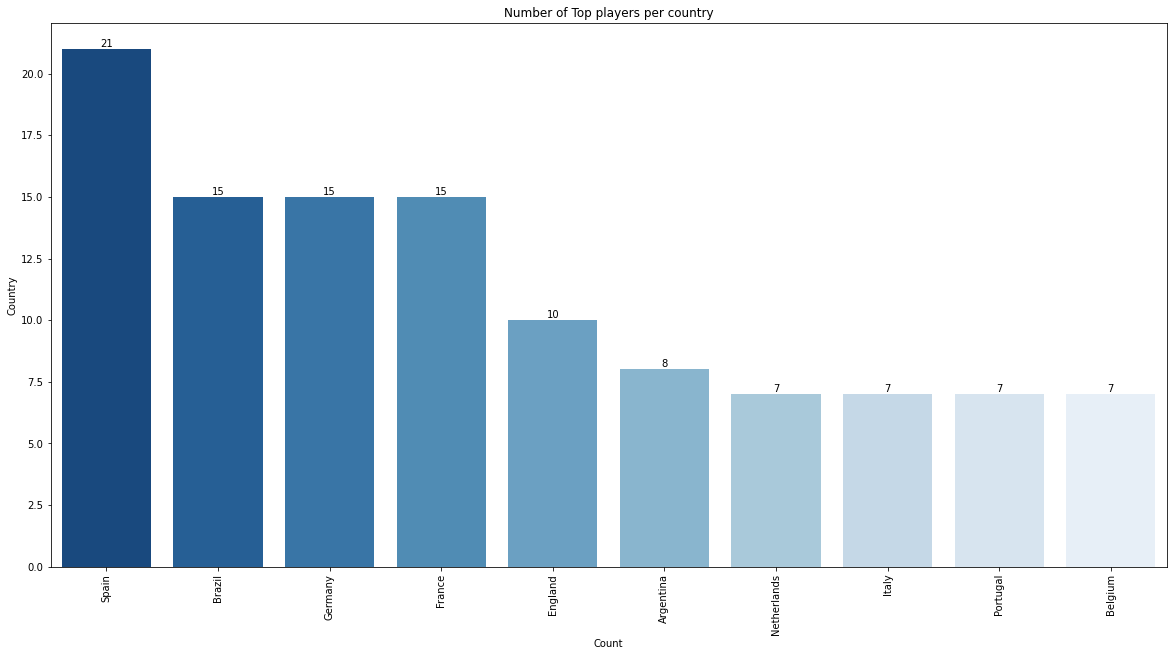

In [58]:
fig, ax1 = plt.subplots(figsize=(20,10))

graph = sns.countplot(ax=ax1, data = fifa, x='nationality', order=fifa['nationality'].value_counts().head(10).index, palette='Blues_r' )

ax1.set(xlabel='Count',ylabel='Country',title='Number of Top players per country',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()

## Analyzing positions 

In [60]:
## Let us analyze the positions

fifa["player_positions"]

0      RW, ST, CF
1          ST, LW
2              GK
3              ST
4         LW, CAM
          ...    
145            GK
146            CB
147    LM, LW, RM
148            LB
149       RB, RWB
Name: player_positions, Length: 150, dtype: object

In [62]:
# Now let us replace these player positions with attacker, midfielder, defender and goalie

positions_list=[]

[positions_list.append(x.split(',')[0]) for x in fifa['player_positions'].values.tolist()]
    
fifa['position']= positions_list


for x in fifa['position']:
    if x in ['ST','CF','RW','LW']:
        fifa['position'].replace(to_replace=x,value='Attacker',inplace=True) 
    if x in ['LM','RM','CM','CDM','CAM']:
        fifa['position'].replace(to_replace=x,value='Midfielder',inplace=True)
    if x in ['LB','RB','CB']:
        fifa['position'].replace(to_replace=x,value='Defender',inplace=True)
    if x in ['GK']:
        fifa['position'].replace(to_replace=x,value='Goalie',inplace=True)

In [63]:
fifa["position"]

0        Attacker
1        Attacker
2          Goalie
3        Attacker
4        Attacker
          ...    
145        Goalie
146      Defender
147    Midfielder
148      Defender
149      Defender
Name: position, Length: 150, dtype: object

In [64]:
# Now let us drop player_position columns 

fifa.drop(columns='player_positions', inplace=True)


In [65]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi,position
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,96,35,24,6,11,15,14,8,24.913495,Attacker
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,95,32,24,7,11,15,14,11,23.735308,Attacker
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,68,12,18,87,92,78,90,90,24.615211,Goalie
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,88,42,19,15,6,12,8,10,23.629490,Attacker
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,93,30,29,9,9,15,15,11,22.204082,Attacker


## How many players do we have in each of the positions? 

In [66]:
fifa["position"].value_counts()

Midfielder    52
Defender      39
Attacker      37
Goalie        22
Name: position, dtype: int64

#### The position a maximum number of players in the top 150 play is midfield position. Let us visualize it below

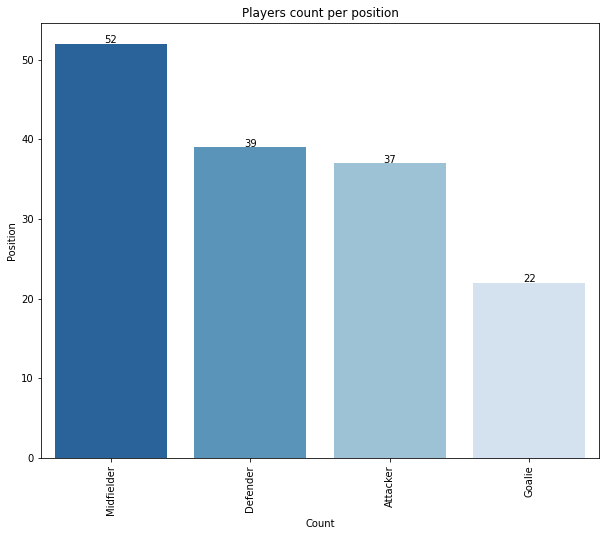

In [68]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sns.countplot(ax=ax1, data= fifa, x='position', order=fifa['position'].value_counts().head(10).index, palette='Blues_r' )

ax1.set(xlabel='Count',ylabel='Position',title='Players count per position',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()

## What is the league that maximum number of players in the top 150 of FIFA rankings play?

In [69]:
fifa["league_name"].value_counts()

English Premier League        48
Spain Primera Division        36
Italian Serie A               30
German 1. Bundesliga          20
French Ligue 1                10
Portuguese Liga ZON SAGRES     4
Holland Eredivisie             2
Name: league_name, dtype: int64

#### Maximum number of players that is 48 in the top 150 of FIFA rankings play English Premier League. It is visualized below.

#### Also, there is no surprise that the top 150 players participate in the leagues of European Nations

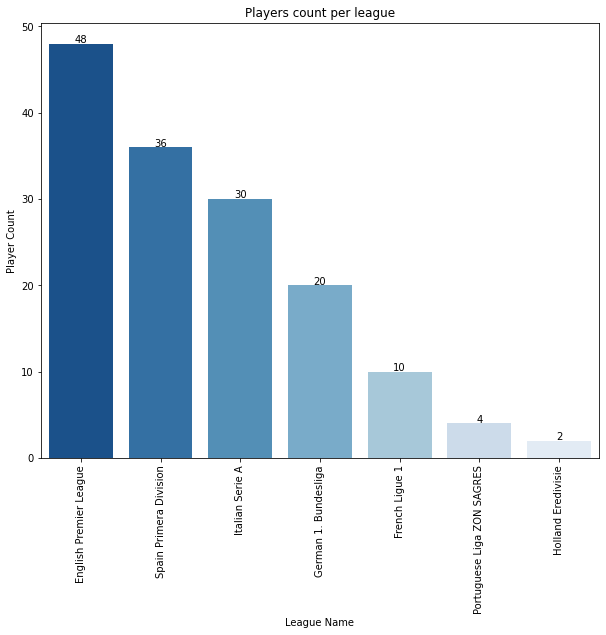

In [70]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sns.countplot(ax=ax1, data= fifa, x='league_name', order=fifa['league_name'].value_counts().index, palette='Blues_r' )

ax1.set(xlabel='League Name',ylabel='Player Count',title='Players count per league',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()

## What are the countries top 10 players belonged to? 

In [83]:
fifa["nationality"].value_counts()[:10].keys()

Index(['Spain', 'Brazil', 'Germany', 'France', 'England', 'Argentina',
       'Netherlands', 'Italy', 'Portugal', 'Belgium'],
      dtype='object')

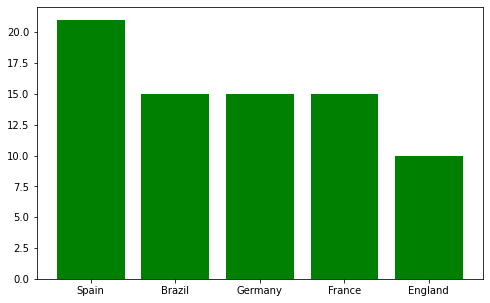

In [84]:
plt.figure(figsize = (8,5))
plt.bar(
    list(fifa['nationality'].value_counts()[:5].keys()), 
    list(fifa['nationality'].value_counts()[:5]),
    color = 'g'
)
plt.show()

## What is the salary of top 10 players ? 

In [86]:
player_salary  = fifa[['short_name', 'wage_eur']]
player_salary.head(10)

,short_name,wage_eur
0,L. Messi,560000
1,Cristiano Ronaldo,220000
2,J. Oblak,125000
3,R. Lewandowski,240000
4,Neymar Jr,270000
5,K. De Bruyne,370000
6,K. Mbappé,160000
7,M. ter Stegen,260000
8,V. van Dijk,210000
9,Alisson,160000


# Who is the highest paid player among the top 150 players? 

In [90]:
player_salary = player_salary.sort_values(by = ['wage_eur'], ascending = False)
player_salary.head()

,short_name,wage_eur
0,L. Messi,560000
5,K. De Bruyne,370000
15,K. Benzema,350000
25,E. Hazard,350000
17,Casemiro,310000


#### Lionel Messi is the highest paid player according to FIFA rankings

## Let us visualize the highest paid player according to FIFA rankings 

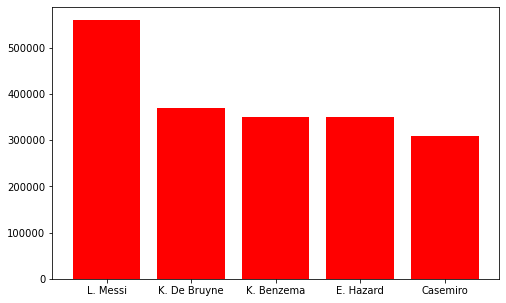

In [91]:
plt.figure(figsize = (8,5))
plt.bar(
    list(player_salary['short_name'][:5]), 
    list(player_salary['wage_eur'][:5]),
    color = 'r'
)
plt.show()

## Who is the player with highest number of shoots? 

In [92]:
player_shooting = fifa[['short_name', 'shooting']]


In [94]:
player_shooting.sort_values(by = ['shooting'], ascending = False).head(10)

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
3,R. Lewandowski,91.0
21,H. Kane,91.0
37,L. Suárez,90.0
13,S. Agüero,90.0
43,C. Immobile,88.0
99,E. Haaland,87.0
136,J. Iličić,86.0
90,M. Reus,86.0


#### Christiano Ronaldo is the player with highest number of shoots

## Who are the top 10 players in defending ? 

In [95]:
player_defending = fifa[['short_name', 'defending', 'nationality', 'club_name']]


In [96]:
player_defending.sort_values(by = ['defending'], ascending = False).head(10)


,short_name,defending,nationality,club_name
8,V. van Dijk,91.0,Netherlands,Liverpool
35,G. Chiellini,90.0,Italy,Juventus
55,M. Hummels,89.0,Germany,Borussia Dortmund
26,K. Koulibaly,89.0,Senegal,Napoli
31,A. Laporte,88.0,France,Manchester City
14,Sergio Ramos,88.0,Spain,Real Madrid
48,R. Varane,87.0,France,Real Madrid
111,W. Ndidi,87.0,Nigeria,Leicester City
68,Marquinhos,87.0,Brazil,Paris Saint-Germain
69,C. Lenglet,87.0,France,FC Barcelona


In [ ]:
## Who are the top 10 players based on goalkeeping reflexes ? 

In [97]:
goalie_reflex = fifa[['short_name', 'goalkeeping_reflexes', 'nationality', 'club_name']]


In [99]:
goalie_reflex.sort_values(by = ['goalkeeping_reflexes'], ascending = False).head(10)


,short_name,goalkeeping_reflexes,nationality,club_name
2,J. Oblak,90,Slovenia,Atlético Madrid
36,H. Lloris,90,France,Tottenham Hotspur
44,K. Navas,90,Costa Rica,Paris Saint-Germain
7,M. ter Stegen,90,Germany,FC Barcelona
9,Alisson,89,Brazil,Liverpool
63,G. Donnarumma,89,Italy,Milan
16,M. Neuer,89,Germany,FC Bayern München
59,De Gea,89,Spain,Manchester United
23,S. Handanovič,89,Slovenia,Inter
122,K. Schmeichel,89,Denmark,Leicester City


#### Four players have the best goalkeeping reflexes; J.Oblak, H.LLoris and so on. 

## Who are the top 10 tallest players?

In [102]:
players_heights = fifa[["short_name", "height_cm"]]

In [104]:
players_heights.sort_values(by = ["height_cm"], ascending = False).head(10)

,short_name,height_cm
12,T. Courtois,199
63,G. Donnarumma,196
40,W. Szczęsny,195
102,N. Süle,195
99,E. Haaland,194
52,Piqué,194
23,S. Handanovič,193
144,T. Strakosha,193
8,V. van Dijk,193
16,M. Neuer,193


#### T. Courtois is the tallest player among the top 150 players in FIFA rankings

<AxesSubplot:xlabel='short_name', ylabel='height_cm'>

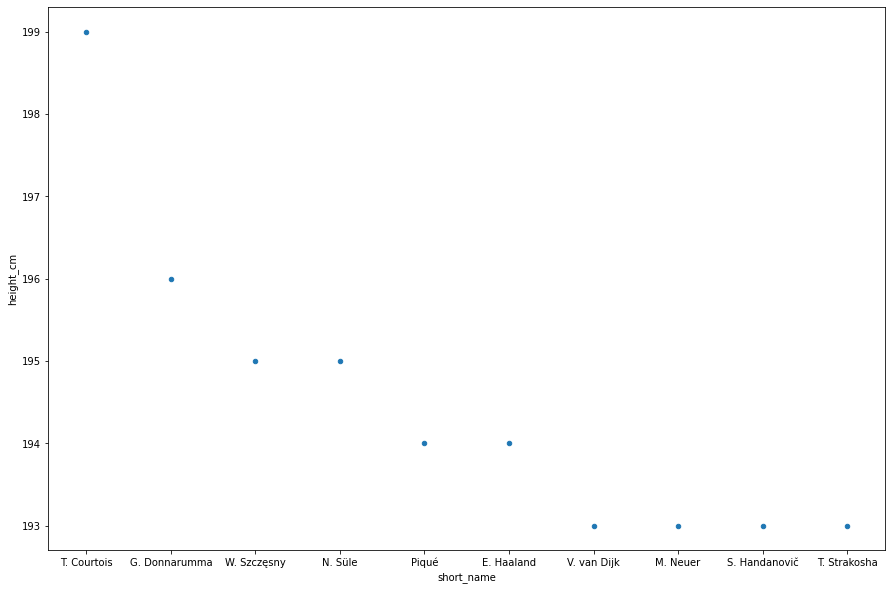

In [105]:
Top_10_tallest_players = players_heights.nlargest(10, "height_cm")
Top_10_tallest_players.plot(x ='short_name', y='height_cm', kind = 'scatter', figsize=(15, 10))

## Who are the top 10 shortest players? 

In [106]:
players_heights.nsmallest(10, "height_cm")

,short_name,height_cm
97,L. Insigne,163
50,M. Verratti,165
51,A. Gómez,167
27,N. Kanté,168
83,D. Mertens,169
0,L. Messi,170
19,R. Sterling,170
57,Jordi Alba,170
116,R. Guerreiro,170
135,W. Ben Yedder,170


<AxesSubplot:xlabel='short_name', ylabel='height_cm'>

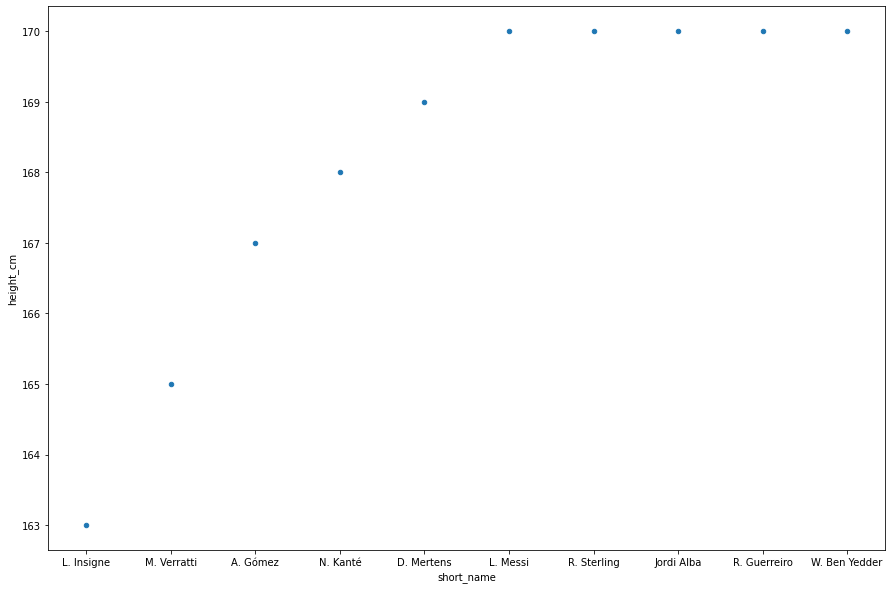

In [107]:
Top_10_shortest_players = players_heights.nsmallest(10, "height_cm")
Top_10_shortest_players.plot(x ='short_name', y='height_cm', kind = 'scatter', figsize=(15, 10))

## Who are the top 10 lowest rated players? 

In [109]:
fifa.nsmallest(10,"overall")


,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi,position
140,F. Valverde,21,182,78,Uruguay,Real Madrid,Spain Primera Division,1.0,83,90,...,82,80,76,6,10,6,15,8,23.547881,Midfielder
141,M. Ødegaard,21,178,68,Norway,Real Madrid,Spain Primera Division,1.0,83,89,...,76,49,51,14,15,15,8,10,21.461937,Midfielder
142,O. Dembélé,23,178,67,France,FC Barcelona,Spain Primera Division,1.0,83,89,...,80,30,33,6,6,14,10,13,21.146320,Attacker
143,Gayà,25,172,66,Spain,Valencia CF,Spain Primera Division,1.0,83,88,...,76,82,84,13,10,9,12,9,22.309356,Defender
144,T. Strakosha,25,193,78,Albania,Lazio,Italian Serie A,1.0,83,88,...,61,18,12,86,79,75,81,88,20.940159,Goalie
145,Pau López,25,189,77,Spain,Roma,Italian Serie A,1.0,83,88,...,62,20,11,82,83,79,82,84,21.555947,Goalie
146,J. Gomez,23,188,77,England,Liverpool,English Premier League,1.0,83,88,...,74,85,82,8,13,14,7,7,21.785876,Defender
147,S. Bergwijn,22,178,78,Netherlands,Tottenham Hotspur,English Premier League,1.0,83,88,...,77,28,26,11,14,12,14,13,24.618104,Midfielder
148,F. Mendy,25,180,73,France,Real Madrid,Spain Primera Division,1.0,83,88,...,78,81,80,7,16,9,10,9,22.530864,Defender
149,A. Wan-Bissaka,22,183,72,England,Manchester United,English Premier League,1.0,83,88,...,76,85,90,9,8,6,8,8,21.499597,Defender


## Who are the top 10 strongest players? 

In [111]:
Strongest_players = fifa.nlargest(10, "power_strength")
Strongest_players

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi,position
78,R. Lukaku,27,191,94,Belgium,Inter,Italian Serie A,1.0,85,86,...,83,41,30,8,15,14,7,10,25.766838,Attacker
26,K. Koulibaly,29,187,89,Senegal,Napoli,Italian Serie A,1.0,88,88,...,82,89,87,7,11,7,13,5,25.451114,Defender
102,N. Süle,24,195,97,Germany,FC Bayern München,German 1. Bundesliga,1.0,84,89,...,75,88,87,15,7,14,7,15,25.509533,Defender
8,V. van Dijk,28,193,92,Netherlands,Liverpool,English Premier League,1.0,90,91,...,90,93,86,13,10,13,11,11,24.698650,Defender
17,Casemiro,28,185,84,Brazil,Real Madrid,Spain Primera Division,1.0,89,89,...,84,88,87,13,14,16,12,12,24.543462,Midfielder
99,E. Haaland,19,194,88,Norway,Borussia Dortmund,German 1. Bundesliga,1.0,84,92,...,83,38,30,7,14,13,11,7,23.381868,Attacker
109,J. Giménez,25,185,80,Uruguay,Atlético Madrid,Spain Primera Division,1.0,84,88,...,75,87,86,9,11,7,10,15,23.374726,Defender
49,P. Pogba,27,191,84,France,Manchester United,English Premier League,1.0,86,87,...,87,67,65,5,6,2,4,3,23.025685,Midfielder
138,Felipe,31,190,83,Brazil,Atlético Madrid,Spain Primera Division,1.0,84,84,...,75,86,83,9,11,14,9,7,22.991690,Defender
64,M. de Ligt,20,189,89,Netherlands,Juventus,Italian Serie A,1.0,85,92,...,82,85,82,12,11,11,12,10,24.915316,Defender


<AxesSubplot:xlabel='short_name', ylabel='power_strength'>

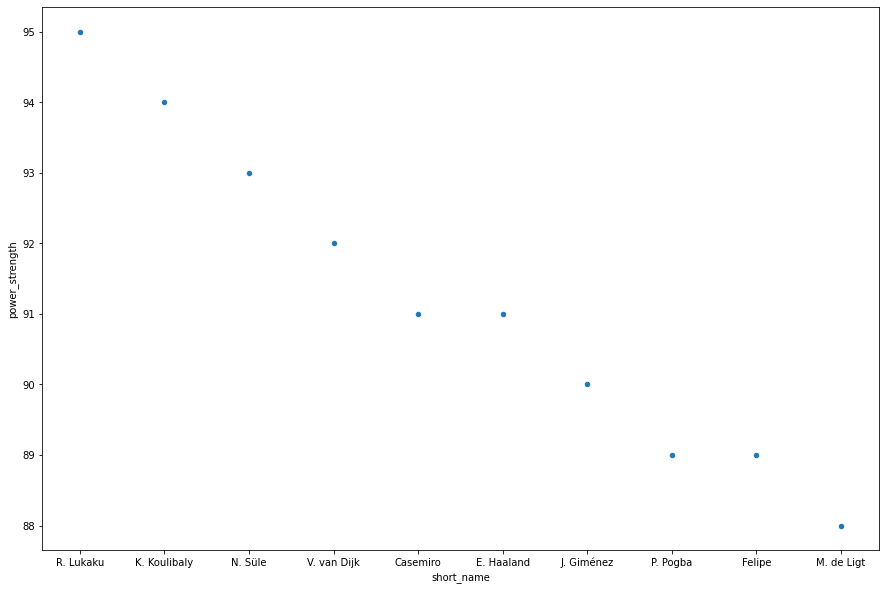

In [112]:
# Graphical representation of the top 10 strongest players:
Strongest_players.plot(x ='short_name', y='power_strength', kind = 'scatter', figsize=(15, 10))

## Comparing the stats of Messi and Ronaldo 

In [122]:
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [125]:
messi = fifa.loc[fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
messi

,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
0,85.0,92.0,91.0,95.0,38.0,65.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,...,91,80,91,94,95,86,68,72,69,94


In [126]:
ronaldo = fifa.loc[fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
ronaldo

,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,89.0,93.0,81.0,89.0,35.0,77.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,...,87,91,87,95,71,94,95,84,78,93


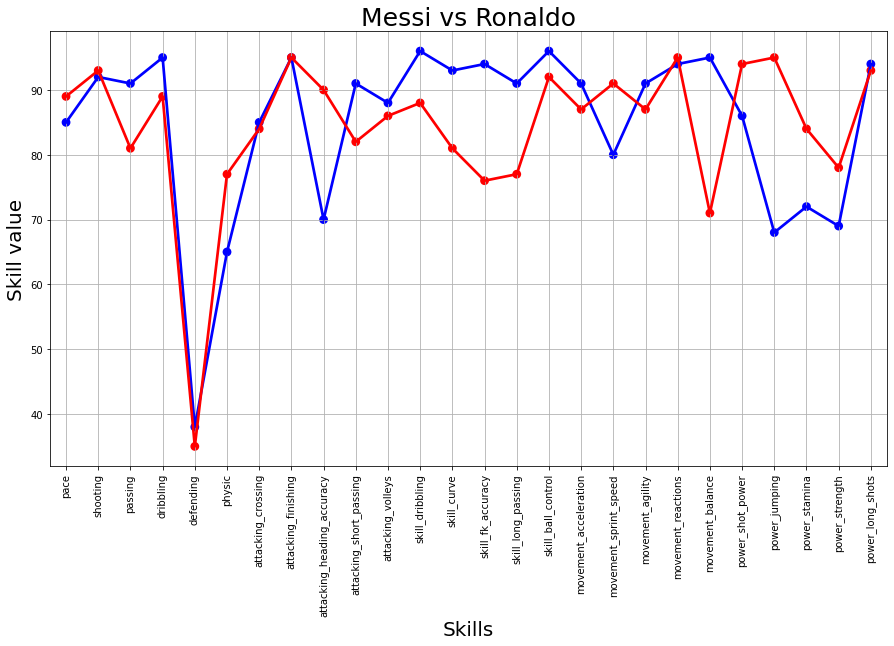

In [121]:
messi = fifa.loc[fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = fifa.loc[fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)


plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)


plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

## Radar comparison of Lionel Messi and Christiano Ronaldo

In [137]:
from math import pi

In [131]:
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = fifa.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,93,93,85.0,92.0,91.0,95.0,38.0,65.0
Cristiano Ronaldo,92,92,89.0,93.0,81.0,89.0,35.0,77.0


In [132]:
values = rival.iloc[0].tolist()
values += values [:1]
values

[93.0, 93.0, 85.0, 92.0, 91.0, 95.0, 38.0, 65.0, 93.0]

In [133]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[92.0, 92.0, 89.0, 93.0, 81.0, 89.0, 35.0, 77.0, 92.0]

In [138]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

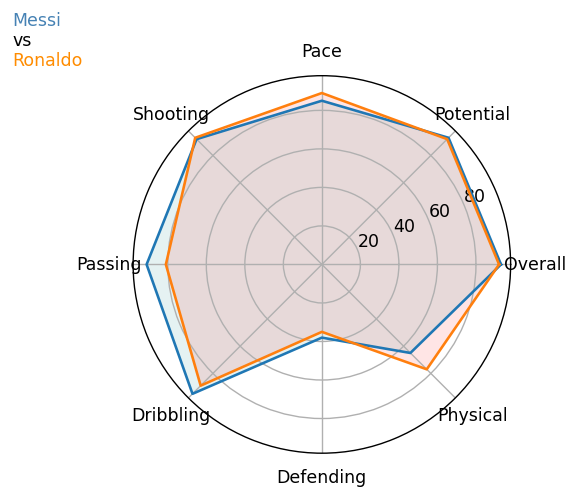

In [139]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

#### Messi has performed well in 5 out of 8 attributes and Christiano Ronaldo has performed well in 3 attributes. 

## What is the overall ability of the top 10? 

In [127]:
fifa.sort_values(by='overall',ascending=False).head(10)[['short_name','age','overall']]


,short_name,age,overall
0,L. Messi,33,93
1,Cristiano Ronaldo,35,92
2,J. Oblak,27,91
3,R. Lewandowski,31,91
4,Neymar Jr,28,91
5,K. De Bruyne,29,91
9,Alisson,27,90
10,S. Mané,28,90
11,M. Salah,28,90
8,V. van Dijk,28,90


## What is the potential ability of top 10 ?

In [128]:
fifa.sort_values(by='potential',ascending=False).head(10)[['short_name','age','potential']]

,short_name,age,potential
6,K. Mbappé,21,95
0,L. Messi,33,93
28,J. Sancho,20,93
2,J. Oblak,27,93
62,K. Havertz,21,93
7,M. ter Stegen,28,93
1,Cristiano Ronaldo,35,92
99,E. Haaland,19,92
64,M. de Ligt,20,92
29,T. Alexander-Arnold,21,92


## Who are the top 10 players with international reputation? 

In [130]:
fifa.sort_values(by='overall',ascending=False).head(10)[['short_name','international_reputation']]

,short_name,international_reputation
0,L. Messi,5
1,Cristiano Ronaldo,5
2,J. Oblak,3
3,R. Lewandowski,4
4,Neymar Jr,5
5,K. De Bruyne,4
9,Alisson,3
10,S. Mané,3
11,M. Salah,3
8,V. van Dijk,3
